In [70]:
'''
Python basic
'''

'\nPython basic\n'

{'whiskers': [<matplotlib.lines.Line2D at 0x558a508>,
 'caps': [<matplotlib.lines.Line2D at 0x558d958>,
 'boxes': [<matplotlib.patches.PathPatch at 0x558a628>,
 'medians': [<matplotlib.lines.Line2D at 0x558d0e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x558dce8>,
 'means': []}

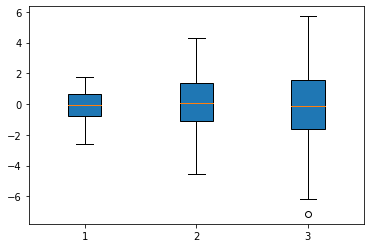

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# ------------------rect box plot ----------
data=[np.random.normal(0,std,100) for std in range(1,4)]
plt.boxplot(data,vert=True,patch_artist=True)

# ---------------histogram--------------
# a=np.array([1,2,3,5,6,7,60,70,80,90])
# plt.hist(a)
# ------sin cos-----
# x=np.arange(0,4*np.pi,0.1)
# y=np.sin(x)
# plt.plot(x,y)

# -----------------------plot------------------
# x= np.arange(0,10)
# y=2*x+8


# plt.subplot(2,2,1)


# plt.plot(x,y,'r*')
# plt.subplot(2,2,2)
# plt.plot(x,y,'r')
# plt.subplot(2,2,3)
# plt.plot(x,y,'r')
# plt.subplot(2,2,4)
# plt.plot(x,y,'r')


In [76]:
import pandas as pd
df=pd.read_html('https://www.w3schools.com/html/html_tables.asp',match='Company',header=0)
df[0]

,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico
2,Ernst Handel,Roland Mendel,Austria
3,Island Trading,Helen Bennett,UK
4,Laughing Bacchus Winecellars,Yoshi Tannamuri,Canada
5,Magazzini Alimentari Riuniti,Giovanni Rovelli,Italy


In [84]:
import seaborn as sn
train= pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

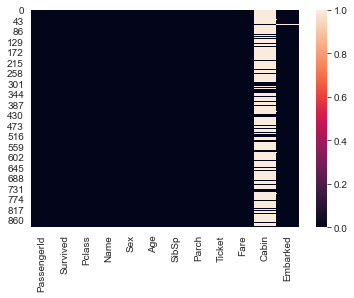

In [86]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
sn.heatmap(data=train.isnull())
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)



In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 69.5+ KB


In [88]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)


In [89]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [90]:
train.head()
train=pd.concat([train,sex,embark],axis=1)


In [91]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a logistic regression model - separate dependent independent feature

In [95]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [96]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.10,random_state=101)